In [2]:
# All required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
single_variable_data = "ex1data1.txt"
multi_variable_data = "ex1data2.txt"

## Part I: (Linear Regression with One Variable)

### 1) Importing and visualising data with pandas

In [3]:
sv_data = pd.read_csv(single_variable_data, header = None) # Loading data into a dataframe with Pandas
sv_data.columns = ["Population", "Profit"] # Defining header

n = 3

sv_data.tail(n) # Gives last n rows from table (5 if uninitialized)

sv_data.sample(n) # Gives n random rows from table (5 if uninitialized)

sv_data.head(n) # Gives first n values from table (5 if uninitialized)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620


### 2) Plotting our data

In [4]:
#Defining x and y values
x_vals = sv_data["Population"] 
y_vals = sv_data["Profit"]

print("First 5 X vals:")
print(x_vals[:5])

print("\n\nFirst 5 Y vals:")
print(y_vals[:5])

First 5 X vals:
0    6.1101
1    5.5277
2    8.5186
3    7.0032
4    5.8598
Name: Population, dtype: float64


First 5 Y vals:
0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64


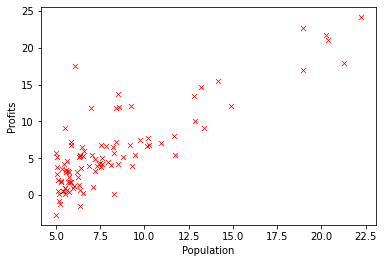

In [5]:
plt.scatter(x_vals, y_vals, s= 25, c= 'red', marker= 'x', linewidths= .75)

plt.xlabel("Population")
plt.ylabel("Profits")
plt.show()

### 3) Implementing Linear Regression Algorithm

In [6]:
def costFunction(theta, x_arr, y_arr):
    m = y_arr.size
    h = theta[0] + (theta[1]*x_arr)
    prediction = np.sum(np.power(h - y_arr, 2))
    return (1/(2*m)) * prediction

In [7]:
def gradientDecent(theta, x_arr, y_arr, alpha, iterations):
    m = y_arr.size
    cost_history = []
    
    for i in range(iterations):
        prediction = theta[0] + (theta[1]*x_arr)
        prediction = prediction.reshape((m,1))

        t0 = theta[0] - (1/m)*alpha * np.sum(prediction - y_arr)
        t1 = theta[1] - (1/m)*alpha * np.sum(x_arr.T.dot(prediction - y_arr))
        
        cost = costFunction(theta, x_arr, y_arr)
        cost_history.append(cost)

        theta[0] = t0
        theta[1] = t1
    
    return theta, cost_history

In [8]:
#Initializing theta values
theta = np.ones((2,1))
print("Theta Matrix:")
print(theta.shape)
print(theta)
print()

#Initializing X variable array 
x_arr = np.array(sv_data["Population"])
x_arr = x_arr.reshape(np.size(x_arr), 1)
print("First 5 X values")
print(x_arr.shape)
print(x_arr[:5])
print('\n')

#Initializing Y variable array
y_arr = np.array(sv_data["Profit"])
y_arr = y_arr.reshape(y_arr.size, 1)
print("First 5 Y values")
print(y_arr.shape)
print(y_arr[:5])

Theta Matrix:
(2, 1)
[[1.]
 [1.]]

First 5 X values
(97, 1)
[[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]]


First 5 Y values
(97, 1)
[[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]]


Theta 0: -3.895780878311793
Theta 1: 1.1930336441895875
Final Cost: 4.476971375975179


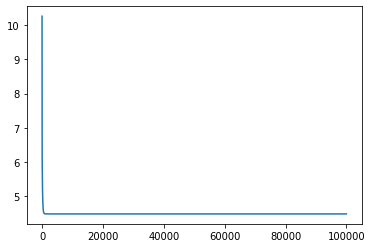

In [9]:
iterations = 100000
learning_rate = .02

theta, cost_history = gradientDecent(theta, x_arr, y_arr, learning_rate, iterations)
print("Theta 0: " + str(theta[0][0]))
print("Theta 1: " + str(theta[1][0]))
print("Final Cost: " + str(cost_history[-1]))

plt.plot(np.arange(1,iterations + 1), cost_history)
plt.show()

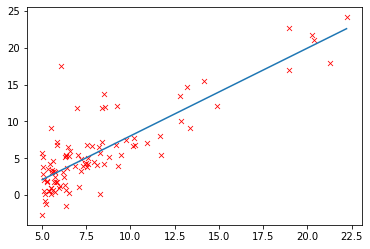

In [10]:
#plotting our linear regression model

x_test = np.linspace(x_arr.min(), x_arr.max(), 100)
y_test = theta[0] + theta[1]*x_test

plt.plot(x_test, y_test)
plt.scatter(x_vals, y_vals, s= 25, c= 'red', marker= 'x', linewidths= .80)
plt.show()

## Part II (Multi-Variable Linear Regression)

In [22]:
mv_data = pd.read_csv(multi_variable_data, header = None)
mv_data.columns = ["Size", "Bedrooms", "Price"]
mv_data.head(10)

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539901
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [12]:
def data_normalize(data_col):
    mean = np.mean(data_col)
    std = np.nanstd(data_col)
    
    data_col = data_col - mean
    data_col = data_col / std
    return data_col, mean, std


In [13]:
mv_data_norm = mv_data
size_mean = 0
size_std = 0
mv_data_norm["Size"], size_mean, size_std = data_normalize(mv_data["Size"])

price_mean = 0
price_std = 0
mv_data_norm["Price"], price_mean, price_std = data_normalize(mv_data["Price"])


In [14]:
def gradientDecent(theta, X, Y, learning_rate, iterations):
    m = Y.size
    cost_history = []
    
    i = 0
    while (i < iterations):
        cost = (1/(2*m)) * (X.dot(theta) - Y).T.dot(X.dot(theta) - Y)
        cost_history.append(cost[0][0])

        prediction = X.dot(theta)
        theta = theta - learning_rate*(1/m) * X.T.dot(prediction - Y)  

        i += 1

    return theta, cost_history

In [15]:
#init values

theta = np.ones((3, 1))

y_arr = np.array(mv_data_norm["Price"])
y_arr = y_arr.reshape(y_arr.size, 1)

x_arr = np.array(mv_data_norm)
x_arr = x_arr[::, :2:]
x_arr = np.c_[np.ones(y_arr.size), x_arr]

print("Thetas Info:")
print("Thetas shape: " + str(theta.shape))
print(theta)

print("\nY matrix sample:")
print("Shape: " + str(y_arr.shape))
print("First 5 vals: ")
print(y_arr[:5])

print("\nX matrix sample:")
print("Shape: " + str(x_arr.shape))
print("First 5 rows: ")
print(x_arr[:5])

Thetas Info:
Thetas shape: (3, 1)
[[1.]
 [1.]
 [1.]]

Y matrix sample:
Shape: (47, 1)
First 5 vals: 
[[ 0.48088992]
 [-0.08498353]
 [ 0.23109721]
 [-0.87639796]
 [ 1.6126449 ]]

X matrix sample:
Shape: (47, 3)
First 5 rows: 
[[ 1.          0.13141542  3.        ]
 [ 1.         -0.5096407   3.        ]
 [ 1.          0.5079087   3.        ]
 [ 1.         -0.74367706  2.        ]
 [ 1.          1.27107075  4.        ]]


Theta:
 [[ 0.22393495]
 [ 0.88476591]
 [-0.0706372 ]]
Final Cost: 0.13352751093577928


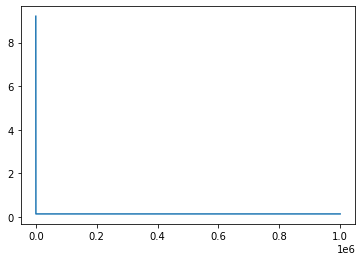

In [25]:
iterations = 1000000
alpha = .15

cost_history = []

new_theta, cost_history = gradientDecent(theta, x_arr, y_arr, alpha, iterations)
print("Theta:\n " + str(new_theta))
print("Final Cost: " + str(cost_history[-1]))

plt.plot(range(iterations), cost_history)
plt.show()

47
100


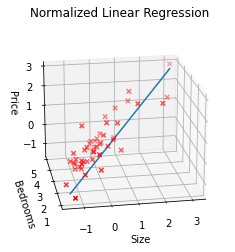

In [24]:
x1_test = np.linspace(mv_data_norm["Size"].min(), mv_data_norm["Size"].max(), 100)
x2_test = np.linspace(mv_data_norm["Bedrooms"].min(), mv_data_norm["Bedrooms"].max(), 100)
y_prediction = new_theta[0] + new_theta[1]*x1_test + new_theta[2]*x2_test


ax = plt.axes(projection= "3d")
ax.plot(x1_test,x2_test,y_prediction)
print(np.size(mv_data_norm["Price"]))
print(y_prediction.size)
ax.scatter(mv_data_norm["Size"], mv_data_norm["Bedrooms"], mv_data_norm["Price"], marker= 'x', c= 'red')
# ax.scatter(mv_data["Size"], mv_data["Bedrooms"], mv_data["Price"], marker= 'x', c= 'red')
ax.set_xlabel("Size")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")
ax.set_title("Normalized Linear Regression")
ax.view_init(elev= 20, azim= 260)

In [18]:
my_prediction = ((new_theta[0] + ((1650-size_mean)/size_std)*new_theta[1] + 3*new_theta[2])*price_std) + price_mean
my_prediction[0]

293081.47383519396

In [19]:
def normalEquation(X, Y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))
    return theta

normal_theta = normalEquation(x_arr, y_arr)
print(normal_theta)
    

[[ 0.22393495]
 [ 0.88476591]
 [-0.0706372 ]]


In [20]:
my_second_prediction = ((normal_theta[0] + ((1650-size_mean)/size_std)*normal_theta[1] + 3*normal_theta[2])*price_std) + price_mean
my_second_prediction[0]

293081.4738351939